In [1]:
from ase.io import read
import matplotlib.pyplot as plt
import numpy as np

In [2]:
x = read("../../data/homonuclear/N2_mace_mp-results.extxyz", index=":")

In [3]:
dists = []
energies = []
for struct in x:
    dists.append(struct.get_distance(0, 1))
    energies.append(struct.get_potential_energy())

energies = np.array(energies) - energies[-1]

In [4]:
energies

array([-3.32523930e+02,  1.93883898e+01,  1.10980345e+02,  1.07499483e+02,
        8.53729533e+01,  5.18276956e+01,  2.31283921e+01,  5.31017866e+00,
       -4.54746875e+00, -9.08092934e+00, -1.03015929e+01, -9.92309586e+00,
       -8.91174255e+00, -7.61967575e+00, -6.29088028e+00, -5.05675796e+00,
       -3.89960206e+00, -2.87984638e+00, -2.01299506e+00, -1.31715329e+00,
       -8.31487603e-01, -5.05825800e-01, -3.05431952e-01, -1.94605899e-01,
       -1.32111901e-01, -9.35587605e-02, -7.20826952e-02, -6.07278871e-02,
       -5.44332954e-02, -5.02836556e-02, -4.54836846e-02, -3.98817274e-02,
       -3.46769211e-02, -2.99207129e-02, -2.55797542e-02, -2.16175684e-02,
       -1.78927664e-02, -1.45351529e-02, -1.18598427e-02, -9.96912601e-03,
       -8.68878881e-03, -7.77412696e-03, -7.04706118e-03, -6.44277871e-03,
       -6.01833140e-03, -5.87882726e-03, -6.04044788e-03, -6.35513726e-03,
       -6.57318916e-03, -6.47813003e-03, -5.97659041e-03, -5.10260361e-03,
       -3.97857973e-03, -

In [5]:
np.argmax(energies)

2

In [6]:
np.tanh(np.max(energies)) * (20 - np.argmax(energies)) / 20

0.9

In [7]:
from scipy.optimize import curve_fit

def morse(x, q, m, u, v):
    return (q * (np.exp(-2*m*(x-u))-2*np.exp(-m*(x-u))) + v)

params, cov = curve_fit(morse, dists[4:], energies[4:], p0=(1, 1, 1, 0))

/var/folders/p8/6555_ljx3zx2m306t4nzkfp00000gn/T/ipykernel_55285/2812171892.py:4: RuntimeWarning: overflow encountered in exp
  return (q * (np.exp(-2*m*(x-u))-2*np.exp(-m*(x-u))) + v)
/var/folders/p8/6555_ljx3zx2m306t4nzkfp00000gn/T/ipykernel_55285/2812171892.py:4: RuntimeWarning: invalid value encountered in subtract
  return (q * (np.exp(-2*m*(x-u))-2*np.exp(-m*(x-u))) + v)


In [8]:
params, cov

(array([9.39171884, 2.06616353, 1.1971289 , 0.38165531]),
 array([[ 2.54947839e-01, -1.39233187e-02,  7.32356570e-05,
          6.04274327e-02],
        [-1.39233187e-02,  2.29144275e-03, -4.77383734e-04,
         -3.97422967e-03],
        [ 7.32356570e-05, -4.77383734e-04,  1.49917580e-04,
          1.52241760e-04],
        [ 6.04274327e-02, -3.97422967e-03,  1.52241760e-04,
          4.23501044e-02]]))

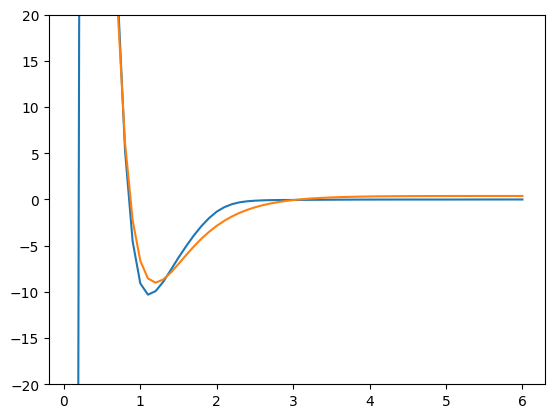

In [9]:
plt.plot(dists[:], energies[:])
plt.plot(dists[1:], morse(dists[1:], *params))
plt.ylim(-20, 20)
plt.show()

In [10]:
min = np.where(energies > 0)[0].min()
min

1

In [11]:
np.where(energies[min:] < 0)[0].min()

7